# Compétition de ML

**Objectif** : Ce TP a pour but de vous mettre en conditions réelles de modélisation d'un problème d'apprentissage automatique. Donné un jeu de données correspondant à une tâche de classification, vous devez apprendre le meilleur modèle possible avec les outils que vous avez appris dans cette EC. Votre modèle sera ensuite évalué sur un jeu de test caché, ce qui révèlera les différentes performances de vos modèles.

**Règles** : par binome, optimisez un modèle de ML que vous soumettrez dans Moodle, sur votre groupe correspondant.

## Le jeu de données

Le jeu de données MNIST est un jeu de données historique du domaine de l'apprentissage automatique et qui a permis de révéler la puissance des réseaux de neurones convulutionnels, ce qui a amené la révolution du Deep Learning depuis 2012.

Ce jeu de données est initialement constitué d'un jeu d'apprentissage de 60 000 données, et d'un jeu de test de 10 000 images. Chaque image représente un chiffre manuscrit issu du système postal américain encodé par une image de 28 par 28 pixels en niveaux de gris. Chaque pixel a donc une valeur entre 0 (noir) et 255 (blanc).

Le but de la tâche associée à ce jeu de donnée est de retrouver le chiffre (parfois mal) écrit (entre 0 et 9). 

Références :
* http://yann.lecun.com/exdb/mnist/
* https://en.wikipedia.org/wiki/MNIST_database

## 1. Chargement du jeu de données

Le jeu de données étant assez conséquent, nous avons réduit le jeu de données à 10000 images, soit environ 1000 données par classe. Chaque image est représentée par un vecteur de taille $28^2 = 784$ dimensions. Ce vecteur est obtenu en concaténant les colonnes de l'image.

In [1]:
import numpy as np
from joblib import load, dump

X, y  = load("data_train.joblib")


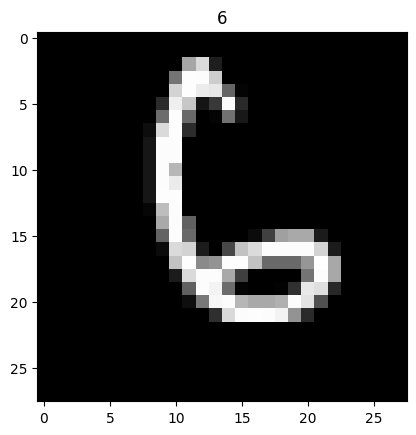

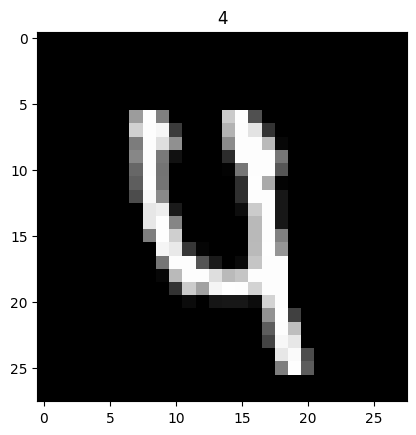

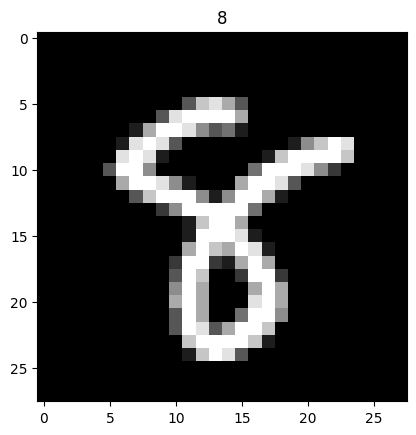

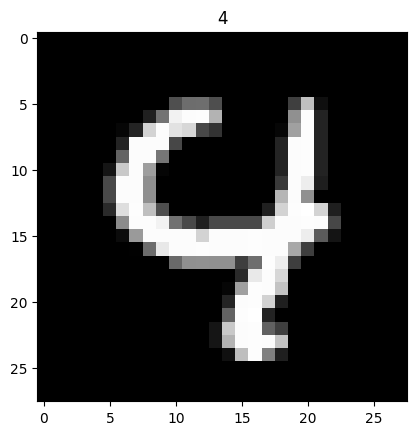

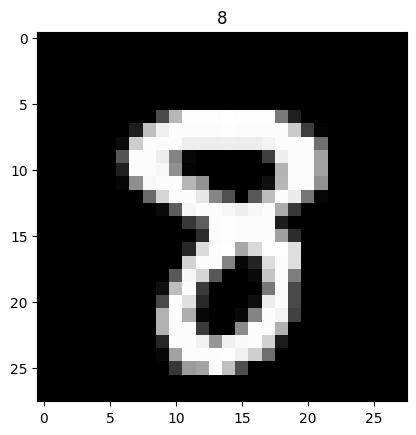

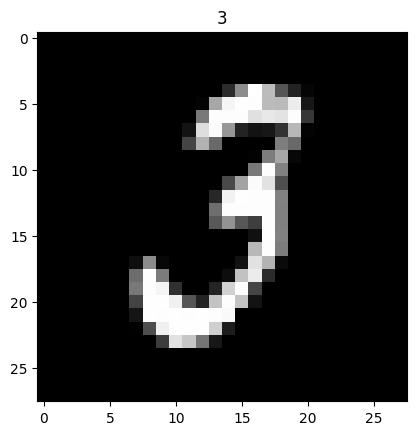

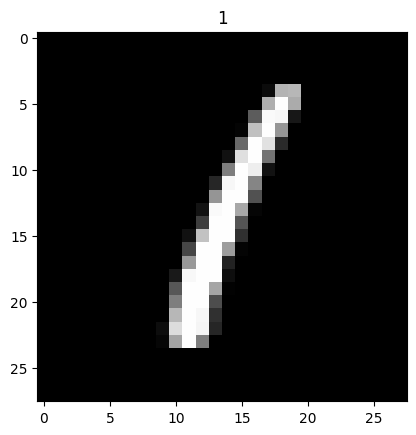

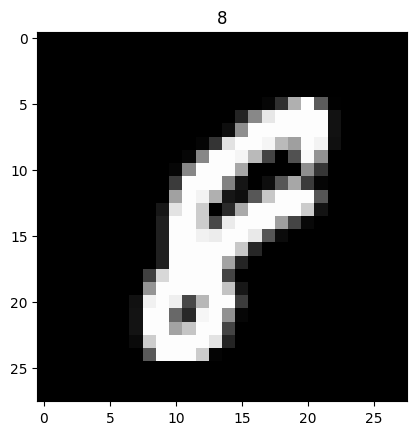

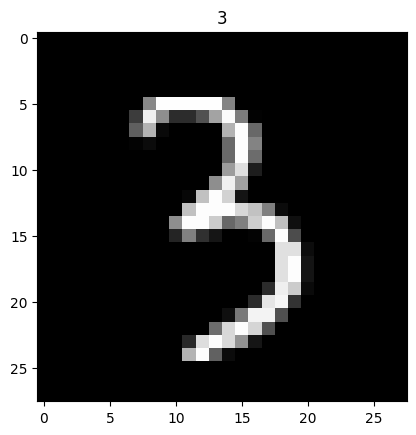

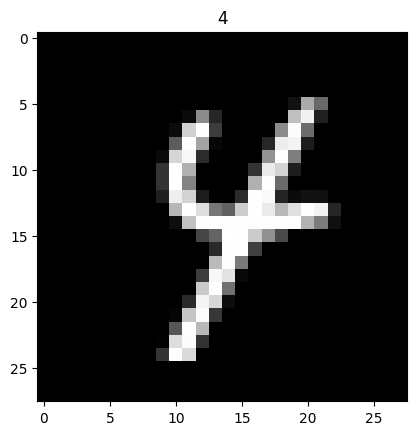

In [2]:
import matplotlib.pyplot as plt

def draw_image(image,y='unknown'):
    plt.figure()
    plt.imshow(image.reshape((28,28)),cmap="gray",vmin=0,vmax=255)
    plt.title(y)

# affichage de quelques images
indexes = np.random.randint(0,10000,10)
for i in indexes:
    draw_image(X[i,:],y[i])

## 2. Conception du modèle

Afin de répondre à la tâche donnée, nous devons mettre en oeuvre un algorithme de classification multi classe (pour chaque chiffre. Pour cette compétition, nous allons nous resteindre aux modèles disponibles dans `scikit-learn`. Comme vu en TP, l'avantage de ces modèles est de fournir une interface similaire pour l'ensemble des méthodes :
* `fit` : pour apprendre le modèle et regler les paramètres internes
* `predict` : pour prédire des données selon les paramètres appris

### Modèles pour la classification
Dans `scikit-learn`, plusieurs méthodes permettent d'effectuer des taches de classification multiclasse. Voici une liste non exhaustive que vous pourrez enrichir. Pour chaque méthode est indiqué les hyperparamètres les plus intéressants à optimiser.

### K-plus proches voisins
[lien vers la doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

Un modèle intuitif et simple mais éprouvé : décider de la classe en regardant la classe des données les plus proches. Vient alors la question de comment définir la notion de distance entre les données ?

Hyperparamètres à optimiser : `n_neighbors`(le nombre de voisins à regarder), `weights` (est ce que chaque voisin a la meme influence, ou alors cette influence est pondérée par la distance ?), `metric` (la distance à utiliser. Vous pouvez même fournir votre propre fonction de distance).


#### Régression logistique
[lien vers la doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Modèle linéaire permettant d'effectuer une classification, et non une régression comme son nom semble l'indiquer.  Méthode simple et efficace, mais reste assez basique.

Hyperparamètres à optimiser : `C`, `penalty`

#### SVM
[lien vers la doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)

Modèle initialement linéaire profitant de "l'astuce du noyau" pour calculer une fonction de décision non linéaire. Ce modèle applique une projection des données dans un espace, ou une frontière de décision linéaire est déterminée. Ces méthodes étaient l'état de l'art avant l'avènement du deep.

Hyperparamètres à optimiser : `C`, `kernel` (manière de comparer deux images, vous pouvez meme implémenter le votre !), `degree` (pour les kernels polynomiaux), `gamma`

Le SVM dans sa version linéaire (peut être plus rapide) : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

#### Arbre de décision
[lien vers la doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

Les arbres de décision permettent de découper l'espace des données afin d'y associer une décision (la classe) à chaque case finale. Les arbres de décision peuvent être assembler en "foret" pour concevoir des modèles plus complexes (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=forest#sklearn.ensemble.RandomForestClassifier). Les arbres et leurs dérivées sont des méthodes plutot anciennes mais remises au gout du jour par de très bonnes performances et une explicabilité appréciable.

Hyperparamètres à optimiser : `max_depth` : profondeur maximum de l'arbre

#### Multi Layer Perceptron
[lien vers la doc](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlp#sklearn.neural_network.MLPClassifier)

Un réseau de neurones classique. Dans la forme initiale, ce réseau comporte une seule couche cachée de 100 neurones, on ne peut donc pas parler de "deep". Aussi, ce n'est pas un CNN et par conséquent, n'est pas idéal pour des données en entrée sous forme d'image. Toutefois, cela reste un bon candidat pour la victoire, surtout avec une bonne architecture voir un prétraitement sur les données.

Hyperparamètres à optimiser : 
* `hidden_layer_sizes` : la définition de votre architecture par une liste d'entiers. Chaque élément de la liste code le nombre de neurones de la couche correspondante. Clairement l'hyperparamètre le plus important du modèle.
* `activation` : la fonction d'activation assurant la non linéarité. Depuis quelques années, `relu` fait consensus mais cela peut valoir le coup de tenter autre chose.
* `alpha` : l'importance de la régularisation

D'autres méthodes de classification sont disponibles dans `scikit-learn`, n'hésitez pas à fouiller mais attention à ne pas perdre trop de temps !

### Stratégies
Afin de vous aiguiller, voici quelques conseils stratégiques.
#### Réglages des hyparamètres
Régler vos hyperparamètres en pensant au sur apprentissage et en appliquant une bonne stratégie (vue en cours) pour éviter les biais le plus possible.

#### Prétraitement 
Rien de vous empêche d'appliquer une transformation quelconque de vos données. Attention à ce que votre modèle intègre bien se préprocessing pour les données de test.

#### Projection et réduction de dimension
Une PCA peut être une bonne stratégie pour réduire la dimension et ainsi accélérer les calculs tout en supprimant du bruit dans vos données.

#### Réduire le dataset
Avec 10 000 images, les temps de calculs peuvent être longs, selon la méthode et les hyperparamètres. Une stratégie peut être de se limiter à un sous ensemble des données, ou alors de calculer un faible nombre de représentants via un K-means par exemple.

#### Conseils généraux
* N'hésitez pas à utiliser 2 Pc en //, ou colab pour tester plusieurs choses.
* Vous ne pourrez pas tout tester, choose wisely
* N'hésitez pas a soumettre régulièrement des modèles. Si votre modele ultime n'a pas le temps de finir l'apprentissage avant la fin. Vous aurez toujours un modèle acceptable.
* Les données de test existent sur le web. Mais je vous déconseille de passer du temps à les récupérer, vous allez passer tout le TP à essayer de les décoder correctement.

## 3. À vous de jouer.
Entrainez un modèle, puis sérialiser le en utilisant la fonction `serialize` fournie. Votre objet sérialisé devra fournir une méthode `predict` permettra de calculer les classes pour un ensemble d'images, comme pour les fonctions `predict` des classes présentées plus haut.

Vous pouvez tester et entrainer différents modèles, mais un seul pourra être déposé sur Moodle.

In [3]:
def serialize(classifier, nom_du_modele:str):
    '''
    Enregistre un fichier dans le répertoire courant avec pour nom nom_du_modele.joblib pouvant être déposé sur moodle.
    classifier est un modele appris avec une fonction predict permettant de prédire la classe d'un ensemble de données.
    : param classifier object : objet python avec une méthode predict qui permet de prédire la classe de nouvelles données
    : param nom_du_modele str : prefixe du fichier à sauvegarder
    
    '''
    dump(classifier, nom_du_modele+'.joblib')